# Treinando um modelo de classificação de imagens

## Importando os pacotes necessários

In [ ]:
from sklearn import datasets
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [10, 10],
          'axes.labelsize': 16,
          'axes.titlesize':16,
          'font.size': 12,
          'legend.fontsize': 10,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10
         }

plt.rcParams.update(params)

## Importando o dataset e pre-processamento de dados

(400, 4096)
(400, 64, 64)
(400,)


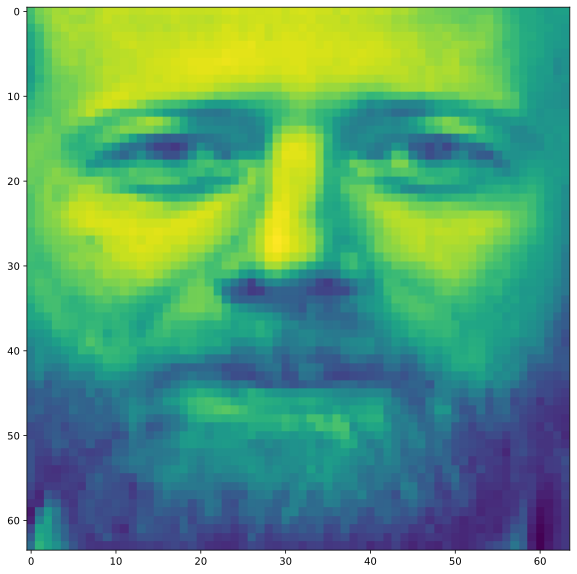

In [ ]:
faces_ds = datasets.fetch_olivetti_faces()
imgs = faces_ds['images']
img_data = faces_ds['data']
img_target = faces_ds['target']

print(img_data.shape)
print(imgs.shape)
print(img_target.shape)
plt.imshow(imgs[250])

#### img_data corresponde às imagens já reformatadas para uma imagem por linha

 #### Vamos utilizar 2 classificadores para comparação: LDA e redes neurais artificiais

In [ ]:
model_LD = LinearDiscriminantAnalysis(solver='svd')
model_ANN = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(60))

## Testando as acurácias utilizando train_test_split

In [ ]:
x_tr, x_te, y_tr, y_te = train_test_split(img_data, img_target, test_size=0.25)

model_ANN.fit(x_tr, y_tr)
model_LD.fit(x_tr, y_tr)

y_pred_ann = model_ANN.predict(x_te)
y_pred_ld = model_LD.predict(x_te)

acc_ann = accuracy_score(y_te, y_pred_ann)
acc_ld = accuracy_score(y_te, y_pred_ld)

print(f'Acuracia - MLP:  {acc_ann*100}%')
print(f'Acuracia - LDA:  {acc_ld*100}%')

Acuracia - MLP:  75.0%
Acuracia - LDA:  97.0%


#### Matriz confusão

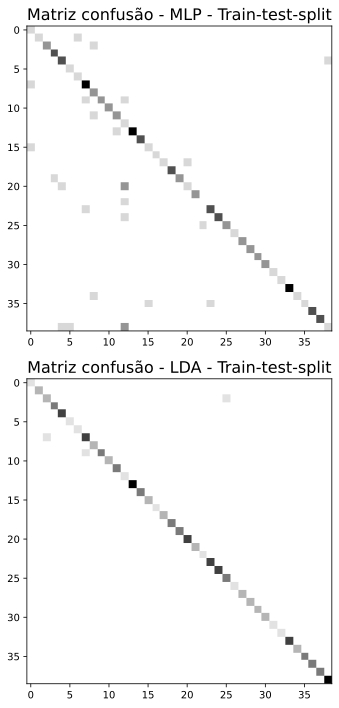

In [ ]:
plt.subplot(211)
plt.imshow(confusion_matrix(y_te, y_pred_ann), cmap='Greys')
plt.title("Matriz confusão - MLP - Train-test-split")

plt.subplot(212)
plt.imshow(confusion_matrix(y_te, y_pred_ld), cmap='Greys')
plt.title("Matriz confusão - LDA - Train-test-split")

plt.tight_layout()

##### O dataset consiste num conjunto imagems de 40 individuos (10 imagens de cada), sendo um grupo relativamente pequeno de pessoas diferentes, o espaço amostral fica bem dividido, de modo que um modelo de análise de discrimente linear pode separar com alta eficácia as classes.

## Testando as acurácias utilizando K-fold

In [ ]:
kf = KFold()

for ind, splits in enumerate(kf.split(range(img_data.shape[0]))):
    print(f'Treino fold {ind+1}: ')

    x_trk, x_tek = img_data[splits[0]], img_data[splits[1]]
    y_trk, y_tek = img_target[splits[0]], img_target[splits[1]]

    model_ANN.fit(x_trk, y_trk)
    model_LD.fit(x_trk, y_trk)

    y_pred_annk = model_ANN.predict(x_tek)
    y_pred_ldk = model_LD.predict(x_tek)

    acc_annk = accuracy_score(y_tek, y_pred_annk)
    acc_ldk = accuracy_score(y_tek, y_pred_ldk)

    print(f'--acc MLP: {acc_annk}')
    print(f'--acc LDA: {acc_ldk}')

Treino fold 1: 
--acc MLP: 0.0
--acc LDA: 0.0
Treino fold 2: 
--acc MLP: 0.0
--acc LDA: 0.0
Treino fold 3: 
--acc MLP: 0.0
--acc LDA: 0.0
Treino fold 4: 
--acc MLP: 0.0
--acc LDA: 0.0
Treino fold 5: 
--acc MLP: 0.0
--acc LDA: 0.0


In [ ]:
kf = KFold(n_splits=5,shuffle=True, random_state=20)

for ind, splits in enumerate(kf.split(range(img_data.shape[0]))):
    print(f'Treino fold {ind+1}: ')

    x_trk, x_tek = img_data[splits[0]], img_data[splits[1]]
    y_trk, y_tek = img_target[splits[0]], img_target[splits[1]]

    model_ANN.fit(x_trk, y_trk)
    model_LD.fit(x_trk, y_trk)

    y_pred_annk = model_ANN.predict(x_tek)
    y_pred_ldk = model_LD.predict(x_tek)

    acc_annk = accuracy_score(y_tek, y_pred_annk)
    acc_ldk = accuracy_score(y_tek, y_pred_ldk)

    print(f'--acc MLP: {round(acc_annk,4)*100}%')
    print(f'--acc LDA: {round(acc_ldk,4)*100}%')

Treino fold 1: 
--acc MLP: 76.25%
--acc LDA: 98.75%
Treino fold 2: 
--acc MLP: 81.25%
--acc LDA: 100.0%
Treino fold 3: 
--acc MLP: 83.75%
--acc LDA: 98.75%
Treino fold 4: 
--acc MLP: 90.0%
--acc LDA: 98.75%
Treino fold 5: 
--acc MLP: 86.25%
--acc LDA: 97.5%


In [ ]:
kf = KFold(n_splits=10,shuffle=True, random_state=20)
models_lda = {}
models_ann = {}

for ind, splits in enumerate(kf.split(range(img_data.shape[0]))):
    print(f'Treino fold {ind+1}: ')

    x_trk, x_tek = img_data[splits[0]], img_data[splits[1]]
    y_trk, y_tek = img_target[splits[0]], img_target[splits[1]]

    model_ANN.fit(x_trk, y_trk)
    model_LD.fit(x_trk, y_trk)

    y_pred_annk = model_ANN.predict(x_tek)
    y_pred_ldk = model_LD.predict(x_tek)

    acc_annk = accuracy_score(y_tek, y_pred_annk)
    acc_ldk = accuracy_score(y_tek, y_pred_ldk)

    cm_annk = confusion_matrix(y_tek, y_pred_annk)
    cm_ldk = confusion_matrix(y_tek, y_pred_ldk)

    print(f'--acc MLP: {round(acc_annk,4)*100}%')
    print(f'--acc LDA: {round(acc_ldk,4)*100}%')

    models_ann[ind] = {"matriz":cm_annk,"acc":acc_annk}
    models_lda[ind] = {"matriz":cm_ldk,"acc":acc_ldk}

Treino fold 1: 
--acc MLP: 75.0%
--acc LDA: 97.5%
Treino fold 2: 
--acc MLP: 87.5%
--acc LDA: 100.0%
Treino fold 3: 
--acc MLP: 75.0%
--acc LDA: 100.0%
Treino fold 4: 
--acc MLP: 90.0%
--acc LDA: 100.0%
Treino fold 5: 
--acc MLP: 80.0%
--acc LDA: 97.5%
Treino fold 6: 
--acc MLP: 92.5%
--acc LDA: 100.0%
Treino fold 7: 
--acc MLP: 90.0%
--acc LDA: 100.0%
Treino fold 8: 
--acc MLP: 92.5%
--acc LDA: 97.5%
Treino fold 9: 
--acc MLP: 85.0%
--acc LDA: 97.5%
Treino fold 10: 
--acc MLP: 77.5%
--acc LDA: 100.0%


## Selecionando a melhor iteração para cada modelo

In [ ]:
best_ann = sorted(models_ann, key = lambda x : models_ann[x]["acc"], reverse = True)[0]
best_lda = sorted(models_lda, key = lambda x : models_lda[x]["acc"], reverse = True)[0]

## Matriz confusão

vamos gerar apenas a matriz confusão correspondente à melhor iteração

In [ ]:
print(f"Melhor iteração - LDA: {best_lda+1}")
print(f"--Acurácia: {round(models_lda[best_lda]['acc'],4)*100}%")
print(f"Melhor iteração - MLP: {best_ann+1}")
print(f"--Acurácia: {round(models_ann[best_ann]['acc'],4)*100}%")

Melhor iteração - LDA: 2
--Acurácia: 100.0%
Melhor iteração - MLP: 6
--Acurácia: 92.5%


Text(0.5, 1.0, 'Matriz confusão - LDA - K-Fold')

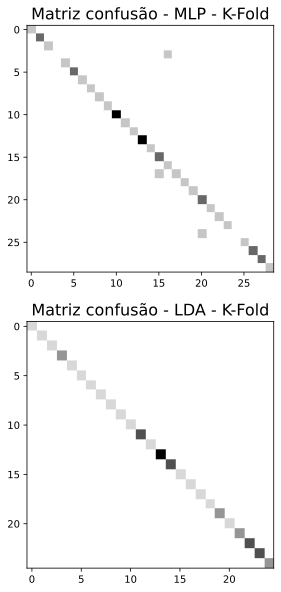

In [ ]:
plt.subplot(211)
plt.imshow(models_ann[best_ann]['matriz'], cmap='Greys')
plt.title("Matriz confusão - MLP - K-Fold")

plt.subplot(212)
plt.imshow(models_lda[best_lda]['matriz'], cmap='Greys')
plt.title("Matriz confusão - LDA - K-Fold")

##### Utilizando o K-Fold com os parâmetros padrão temos a eficácia de 0, o que faz sentido, pois com o parametro "Shuffle" no padrão False estariamos sempre utilizando alguma classe no teste que não estava presente no treino. Já com  o shuffle as classes estarão sempre misturadas, entao o treino encontrará, na maioria das vezes, pelo menos 1 exemplo de cada classe, e aumentando o numero de splits temos um aumento também na acurácia, pois o conjunto de treino fica maior.

### testando as acurácias utilizando Resample (Bootstrap)

Parametros iniciais do Bootstrap

In [ ]:
sample_size = int(img_data.shape[0]*0.8) ## 80% dos dados no resampling
n_bootstraps = 5

In [ ]:
models_ldab = {}
models_annb = {}

for ind in range(n_bootstraps):
    print(f'Treino bootstrap {ind+1}: ')

    boot = resample(range(img_data.shape[0]), replace = True, n_samples = sample_size, stratify = img_target)
    oob = [x for x in range(img_data.shape[0]) if x not in boot]

    x_trb, y_trb = img_data[boot], img_target[boot]
    x_teb, y_teb = img_data[oob], img_target[oob]

    model_ANN.fit(x_trb, y_trb)
    model_LD.fit(x_trb, y_trb)

    y_pred_annb = model_ANN.predict(x_teb)
    y_pred_ldb = model_LD.predict(x_teb)

    acc_annb = accuracy_score(y_teb, y_pred_annb)
    acc_ldb = accuracy_score(y_teb, y_pred_ldb)

    cm_annb = confusion_matrix(y_teb, y_pred_annb)
    cm_ldb = confusion_matrix(y_teb, y_pred_ldb)

    print(f'--acc MLP: {round(acc_annb*100,3)}%')
    print(f'--acc LDA: {round(acc_ldb*100,3)}%')

    models_annb[ind] = {"matriz":cm_annk,"acc":acc_annb}
    models_ldab[ind] = {"matriz":cm_ldk,"acc":acc_ldb}

Treino bootstrap 1: 
--acc MLP: 73.988%
--acc LDA: 95.954%
Treino bootstrap 2: 
--acc MLP: 61.404%
--acc LDA: 94.737%
Treino bootstrap 3: 
--acc MLP: 73.529%
--acc LDA: 97.647%
Treino bootstrap 4: 
--acc MLP: 77.011%
--acc LDA: 91.379%
Treino bootstrap 5: 
--acc MLP: 2.353%
--acc LDA: 93.529%


In [ ]:
models_ldab = {}
models_annb = {}
n_bootstraps=15

for ind in range(n_bootstraps):
    print(f'Treino bootstrap {ind+1}: ')


    boot = resample(range(img_data.shape[0]), replace = False, n_samples = sample_size, stratify = img_target)
    oob = [x for x in range(img_data.shape[0]) if x not in boot]

    x_trb, y_trb = img_data[boot], img_target[boot]
    x_teb, y_teb = img_data[oob], img_target[oob]

    model_ANN.fit(x_trb, y_trb)
    model_LD.fit(x_trb, y_trb)

    y_pred_annb = model_ANN.predict(x_teb)
    y_pred_ldb = model_LD.predict(x_teb)

    acc_annb = accuracy_score(y_teb, y_pred_annb)
    acc_ldb = accuracy_score(y_teb, y_pred_ldb)

    cm_annb = confusion_matrix(y_teb, y_pred_annb)
    cm_ldb = confusion_matrix(y_teb, y_pred_ldb)

    print(f'--acc MLP: {round(acc_annb*100,3)}%')
    print(f'--acc LDA: {round(acc_ldb*100,3)}%')

    models_annb[ind] = {"matriz":cm_annk,"acc":acc_annb}
    models_ldab[ind] = {"matriz":cm_ldk,"acc":acc_ldb}

Treino bootstrap 1: 
--acc MLP: 81.25%
--acc LDA: 98.75%
Treino bootstrap 2: 
--acc MLP: 80.0%
--acc LDA: 96.25%
Treino bootstrap 3: 
--acc MLP: 92.5%
--acc LDA: 98.75%
Treino bootstrap 4: 
--acc MLP: 87.5%
--acc LDA: 98.75%
Treino bootstrap 5: 
--acc MLP: 80.0%
--acc LDA: 100.0%
Treino bootstrap 6: 
--acc MLP: 78.75%
--acc LDA: 98.75%
Treino bootstrap 7: 
--acc MLP: 80.0%
--acc LDA: 98.75%
Treino bootstrap 8: 
--acc MLP: 86.25%
--acc LDA: 98.75%
Treino bootstrap 9: 
--acc MLP: 83.75%
--acc LDA: 98.75%
Treino bootstrap 10: 
--acc MLP: 86.25%
--acc LDA: 97.5%
Treino bootstrap 11: 
--acc MLP: 80.0%
--acc LDA: 98.75%
Treino bootstrap 12: 
--acc MLP: 81.25%
--acc LDA: 97.5%
Treino bootstrap 13: 


/Users/leonsanchez/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


--acc MLP: 51.25%
--acc LDA: 98.75%
Treino bootstrap 14: 
--acc MLP: 85.0%
--acc LDA: 100.0%
Treino bootstrap 15: 
--acc MLP: 75.0%
--acc LDA: 98.75%


In [ ]:
best_annb = sorted(models_annb, key = lambda x : models_annb[x]["acc"], reverse = True)[0]
best_ldab = sorted(models_ldab, key = lambda x : models_ldab[x]["acc"], reverse = True)[0]

#### Matriz confusão

In [ ]:
print(f"Melhor iteração - LDA: {best_ldab+1}")
print(f"--Acurácia: {round(models_ldab[best_ldab]['acc']*100,3)}%")
print(f"Melhor iteração - MLP: {best_annb+1}")
print(f"--Acurácia: {round(models_annb[best_annb]['acc']*100,3)}%")

Melhor iteração - LDA: 3
--Acurácia: 100.0%
Melhor iteração - MLP: 7
--Acurácia: 90.0%


Text(0.5, 1.0, 'Matriz confusão - LDA - Bootstrap')

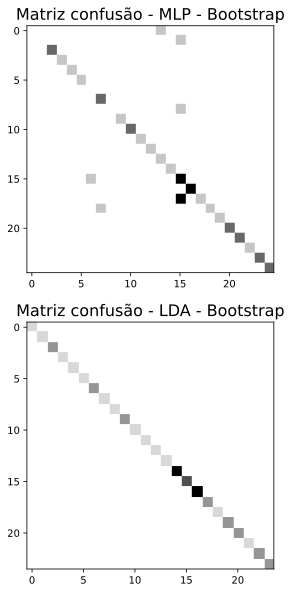

In [ ]:
plt.subplot(211)
plt.imshow(models_annb[best_annb]['matriz'], cmap='Greys')
plt.title("Matriz confusão - MLP - Bootstrap")

plt.subplot(212)
plt.imshow(models_ldab[best_ldab]['matriz'], cmap='Greys')
plt.title("Matriz confusão - LDA - Bootstrap")

##### O bootstrap,  assim como o K-Fold, é um metódo de validação cruzada, então o resultado é bem parecido, aumentando também um pouco a acurácia com o aumento dos bootstraps.

## Referências

[Scikit-Learn - Datasets - Olivetti Faces](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)

[Scikit-Learn - Resample (Bootstrap)](http://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - LinearDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

[Scikit-Learn - LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[Scikit-Learn - MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)